In [65]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

1. Download data

In [115]:
df = pd.read_csv("dataset.csv", encoding = 'utf_8')
pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


2. Choose records with languages of the interest

In [116]:
df = df[df.language.isin(['Spanish', 'English'])]
df.head()

,Text,language
21,en navidad de poco después de que interpretó ...,Spanish
37,in johnson was awarded an american institute ...,English
40,bussy-saint-georges has built its identity on ...,English
76,minnesotas state parks are spread across the s...,English
90,nordahl road is a station served by north coun...,English


3. Calculate counts for letters in each text

In [117]:
for i in range(ord('a'), ord('z')+1):
    df[chr(i)] = df.Text.apply(lambda s: s.lower().count(chr(i)))
df.head()

,Text,language,a,b,c,d,e,f,g,h,...,q,r,s,t,u,v,w,x,y,z
21,en navidad de poco después de que interpretó ...,Spanish,24,1,8,12,22,1,2,1,...,2,13,6,5,6,2,0,0,1,0
37,in johnson was awarded an american institute ...,English,16,1,9,5,20,3,2,8,...,0,15,8,19,4,0,3,0,0,2
40,bussy-saint-georges has built its identity on ...,English,15,2,6,8,31,3,7,6,...,1,16,21,21,3,1,1,0,5,0
76,minnesotas state parks are spread across the s...,English,77,5,27,19,68,5,10,22,...,0,59,64,65,11,4,7,3,4,2
90,nordahl road is a station served by north coun...,English,30,4,12,20,19,5,3,11,...,0,22,27,31,2,2,4,0,4,0


4. Plot the distribution letters in the entire set (corpus) by language

<AxesSubplot:>

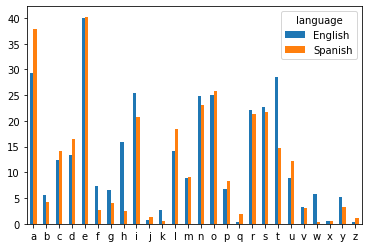

In [118]:
df.groupby('language').mean().T.plot.bar(rot=0)

5. Looks like we can use the characters as features (the distributions are different)

In [119]:
X = df.iloc[:,2:] #take columns with counts
y = df['language'].map({'English':1, 'Spanish':0}) #target column (encoded)

In [120]:
X.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
21,24,1,8,12,22,1,2,1,11,0,...,2,13,6,5,6,2,0,0,1,0
37,16,1,9,5,20,3,2,8,17,1,...,0,15,8,19,4,0,3,0,0,2
40,15,2,6,8,31,3,7,6,14,0,...,1,16,21,21,3,1,1,0,5,0
76,77,5,27,19,68,5,10,22,48,2,...,0,59,64,65,11,4,7,3,4,2
90,30,4,12,20,19,5,3,11,32,0,...,0,22,27,31,2,2,4,0,4,0


In [121]:
y.head()

21    0
37    1
40    1
76    1
90    1
Name: language, dtype: int64

6. Normalize each line of X

In [122]:
X = X.div(X.sum(axis=1), axis=0)
X.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
21,0.146341,0.006098,0.048780,0.073171,0.134146,0.006098,0.012195,0.006098,0.067073,0.000000,...,0.012195,0.079268,0.036585,0.030488,0.036585,0.012195,0.000000,0.000000,0.006098,0.000000
37,0.096970,0.006061,0.054545,0.030303,0.121212,0.018182,0.012121,0.048485,0.103030,0.006061,...,0.000000,0.090909,0.048485,0.115152,0.024242,0.000000,0.018182,0.000000,0.000000,0.012121
40,0.069767,0.009302,0.027907,0.037209,0.144186,0.013953,0.032558,0.027907,0.065116,0.000000,...,0.004651,0.074419,0.097674,0.097674,0.013953,0.004651,0.004651,0.000000,0.023256,0.000000
76,0.115616,0.007508,0.040541,0.028529,0.102102,0.007508,0.015015,0.033033,0.072072,0.003003,...,0.000000,0.088589,0.096096,0.097598,0.016517,0.006006,0.010511,0.004505,0.006006,0.003003
90,0.100671,0.013423,0.040268,0.067114,0.063758,0.016779,0.010067,0.036913,0.107383,0.000000,...,0.000000,0.073826,0.090604,0.104027,0.006711,0.006711,0.013423,0.000000,0.013423,0.000000


7. Split the data into Train and Test sets

In [123]:
X_train, X_test, y_train, y_test \
= train_test_split(X, y, test_size=0.33, random_state=42)

8. Use any model for classiffication

In [124]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

9. Look at the performance of the model using cross validation, i.e., using one part of Train set for testing

In [125]:
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy").mean()

0.9776119402985074

10. Use all Train data to fit the model

In [126]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

11. Do prediction on the Test

In [127]:
y_predict = sgd_clf.predict(X_test)

12. Calculate the accuracy on the Test  

In [128]:
sgd_clf.score(X_test,y_test)

0.9681818181818181

13. Calculate the confusion matrix

In [129]:
CM = confusion_matrix(y_test, y_predict)
CM

array([[303,  19],
       [  2, 336]])

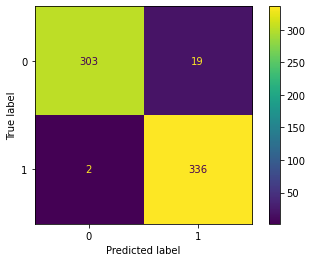

In [130]:
plot_confusion_matrix(sgd_clf, X_test, y_test) #fancier way

In [131]:
from IPython.display import Markdown as md
md(f"That means, our model predicted {CM[1,0]} English phrases as Spanish (Fals Negative) \
  and {CM[0,1]} Spanish phrases as English (Fals Positive). Therefore,\
  $Presision = {CM[1,1]}/({CM[1,1]}+{CM[0,1]})= {CM[1,1]/(CM[1,1]+CM[0,1])}$ and\
  $Recall = {CM[1,1]}/({CM[1,1]}+{CM[1,0]})= {CM[1,1]/(CM[1,1]+CM[1,0])}$") 

That means, our model predicted 2 English phrases as Spanish (Fals Negative)   and 19 Spanish phrases as English (Fals Positive). Therefore,  $Presision = 336/(336+19)= 0.9464788732394366$ and  $Recall = 336/(336+2)= 0.9940828402366864$

14. For this task, accuracy (the fraction of correct predictions) is a good metric for the quality evaluation, but other metrics like precision can be used as well.